In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
import matplotlib.colors as mcolors

filterwarnings('ignore')

plt.style.use('ggplot')
pd.options.display.max_columns = 999

In [174]:
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}   

TRAIN_DATA_PATH = "train_data.csv"
TEST_DATA_PATH = "test_data.csv"
train = pd.read_csv(TRAIN_DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
train = train.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

test = pd.read_csv(TEST_DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
test = test.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

train['test_group'] = train['testId'].apply(lambda x: x[2])
test['test_group'] = test['testId'].apply(lambda x: x[2])

In [5]:
print(f"----------- TRAIN dataset -----------")
print(f"user 명수            : {train.userID.nunique()}")
print(f"assesmentItemID 종류 : {train.assessmentItemID.nunique()}")
print(f"testId 종류          : {train.testId.nunique()}")
print(f"answer 비율          : {train.answerCode.sum() / train.shape[0] * 100:.2f}")
print(f"KnowledgeTag 종류    : {train.KnowledgeTag.nunique()}")
print(f"----------- TEST dataset -----------")
print(f"user 명수            : {test.userID.nunique()}")
print(f"assesmentItemID 종류 : {test.assessmentItemID.nunique()}")
print(f"testId 종류          : {test.testId.nunique()}")
print(f"answer 비율          : {test.answerCode.sum() / test.shape[0] * 100:.2f}")
print(f"KnowledgeTag 종류    : {test.KnowledgeTag.nunique()}")

----------- TRAIN dataset -----------
user 명수            : 6698
assesmentItemID 종류 : 9454
testId 종류          : 1537
answer 비율          : 65.44
KnowledgeTag 종류    : 912
----------- TEST dataset -----------
user 명수            : 744
assesmentItemID 종류 : 9454
testId 종류          : 1537
answer 비율          : 65.22
KnowledgeTag 종류    : 912


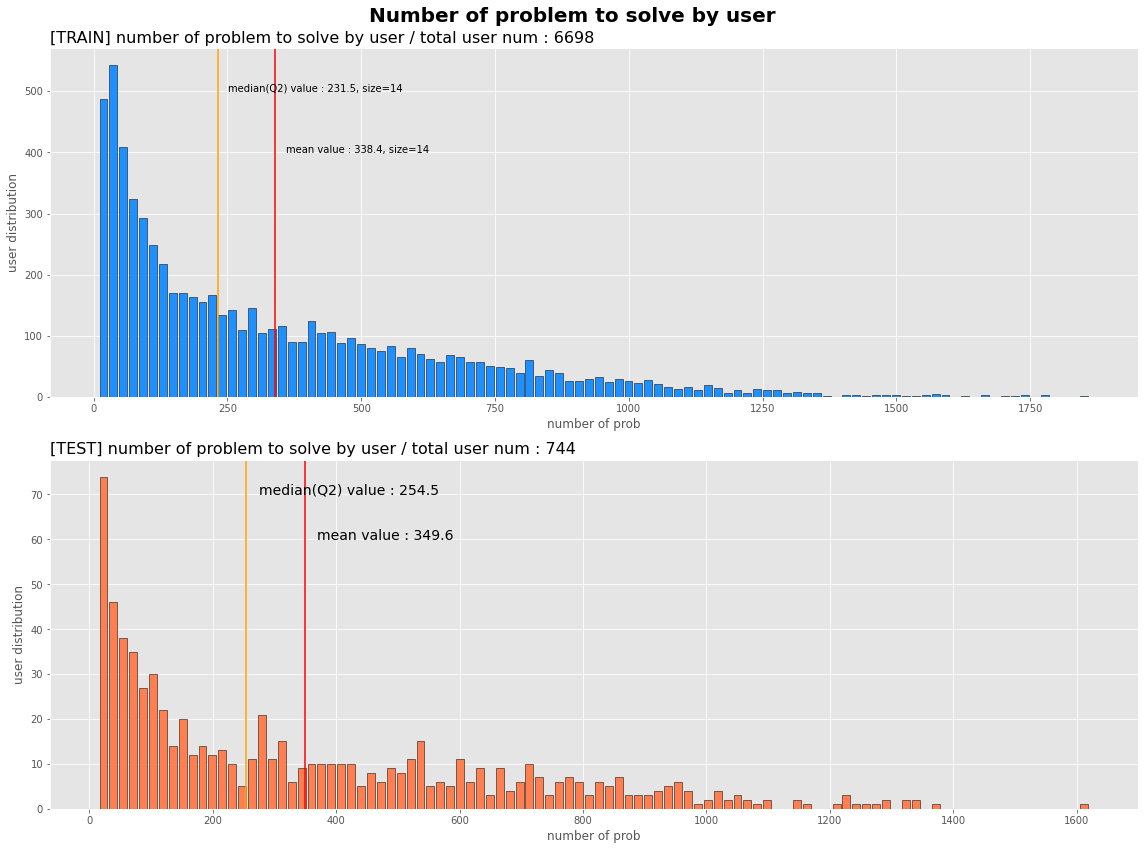

In [92]:
def user_problem(train, test):
    fig, axes = plt.subplots(2,1,figsize=(16,12))

    axes[0].hist(train.groupby("userID")['answerCode'].count(), bins = 100, rwidth=0.8, color='dodgerblue', edgecolor='black')
    axes[0].set_title(f"[TRAIN] number of problem to solve by user / total user num : {len(train.groupby('userID')['answerCode'].count())}",
                      loc='left', size=16)
    axes[0].set_xlabel('number of prob')
    axes[0].set_ylabel('user distribution')
    _mean = train.groupby("userID")['answerCode'].count().mean()
    _median = train.groupby("userID")['answerCode'].count().median()
    axes[0].axvline(x = _mean, color = 'r')
    axes[0].axvline(x = _median, color = 'orange')
    axes[0].text(x = _mean+20, y = 400,s = f"mean value : {_mean:.1f}, size=14")
    axes[0].text(x = _median+20, y = 500,s = f"median(Q2) value : {_median:.1f}, size=14")

    axes[1].hist(test.groupby("userID")['answerCode'].count(), bins = 100, rwidth=0.8, color='coral', edgecolor='black')
    axes[1].set_title(f"[TEST] number of problem to solve by user / total user num : {len(test.groupby('userID')['answerCode'].count())}",
                      loc='left', size=16)
    axes[1].set_xlabel('number of prob')
    axes[1].set_ylabel('user distribution')
    _mean = test.groupby("userID")['answerCode'].count().mean()
    _median = test.groupby("userID")['answerCode'].count().median()
    axes[1].axvline(x = _mean, color = 'r')
    axes[1].axvline(x = _median, color = 'orange')
    axes[1].text(x = _mean+20, y = 60,s = f"mean value : {_mean:.1f}", size=14)
    axes[1].text(x = _median+20, y = 70,s = f"median(Q2) value : {_median:.1f}", size=14)

    plt.suptitle("Number of problem to solve by user", weight='bold', size=20)
    plt.tight_layout()
    plt.savefig("_00_user_problem", dpi=300)
    plt.show();
    
user_problem(train, test)

### 00 user 별로 푼 문제의 수와 분포를 나타낸다.
1. 문제를 적게 푼 사람이 400~500 명씩 꽤 많은 분포가 있는 것을 알 수 있다.  
    : `문제 수가 적을 수록 과적합될 여지`가 많기 때문에, `문제를 적게 푼 user 에 대해서 모델의 결과값을 비교 분석`할 필요가 있겠다.
2. train 과 test set 의 분포는 전반적으로 비슷하다.

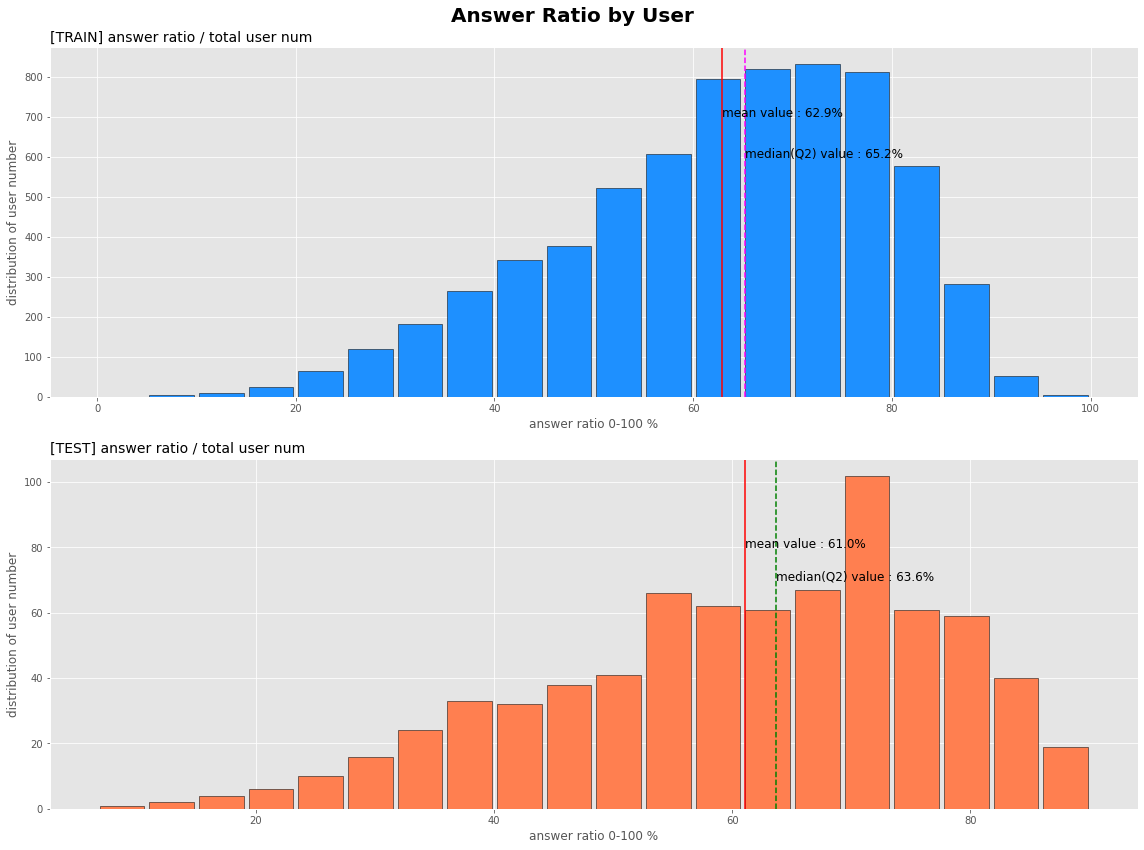

In [144]:
def answer_ratio(train, test):
    fig, axes = plt.subplots(2,1, figsize=(16,12))

    answer_ratio_by_user = train.groupby('userID')['answerCode'].sum()/train.groupby('userID')['answerCode'].count()*100
    axes[0].hist(answer_ratio_by_user, bins = 20, rwidth=0.9, color='dodgerblue',edgecolor='black')
    axes[0].set_title(f"[TRAIN] answer ratio / total user num", size=14, loc='left')
    axes[0].set_xlabel('answer ratio 0-100 %')
    axes[0].set_ylabel('distribution of user number')
    _mean = answer_ratio_by_user.mean()
    _median = answer_ratio_by_user.median()
    axes[0].axvline(x = _mean, color = 'r')
    axes[0].axvline(x = _median, color = 'fuchsia', linestyle='--')
    axes[0].text(x = _mean, y = 700,s = f"mean value : {_mean:.1f}%", size=12)
    axes[0].text(x = _median, y = 600,s = f"median(Q2) value : {_median:.1f}%", size=12);

    answer_ratio_by_user = test.groupby('userID')['answerCode'].sum()/test.groupby('userID')['answerCode'].count()*100
    axes[1].hist(answer_ratio_by_user, bins = 20, rwidth=0.9, color='coral', edgecolor='black')
    axes[1].set_title(f"[TEST] answer ratio / total user num", size=14, loc='left')
    axes[1].set_xlabel('answer ratio 0-100 %')
    axes[1].set_ylabel('distribution of user number')
    _mean = answer_ratio_by_user.mean()
    _median = answer_ratio_by_user.median()
    axes[1].axvline(x = _mean, color = 'r')
    axes[1].axvline(x = _median, color = 'green', linestyle='--')
    axes[1].text(x = _mean, y = 80,s = f"mean value : {_mean:.1f}%", size=12)
    axes[1].text(x = _median, y = 70,s = f"median(Q2) value : {_median:.1f}%",size=12);

    plt.suptitle('Answer Ratio by User', weight='bold', size=20)
    plt.tight_layout()
    plt.savefig("_10_answer_ratio", dpi=300)
    plt.show();
    
answer_ratio(train, test)


### 10 user 정답률을 나타낸다.
1. 학생별 정답률의 분포는 bins=20 기준으로 위와 같다.
2. Train 데이터셋과 Test 데이터셋은 약 2%의 평균 및 중앙값 정답률 차이를 보인다. 
3. Train 데이터와 Test 데이터의 정답률 분포가 다르다.
4. Validation set 을 구축할 때, assessmentItemID 등의 column 의 유사도 외에도 Test 데이터셋과의 정답률 분포도 확인해볼 필요가 있겠다.

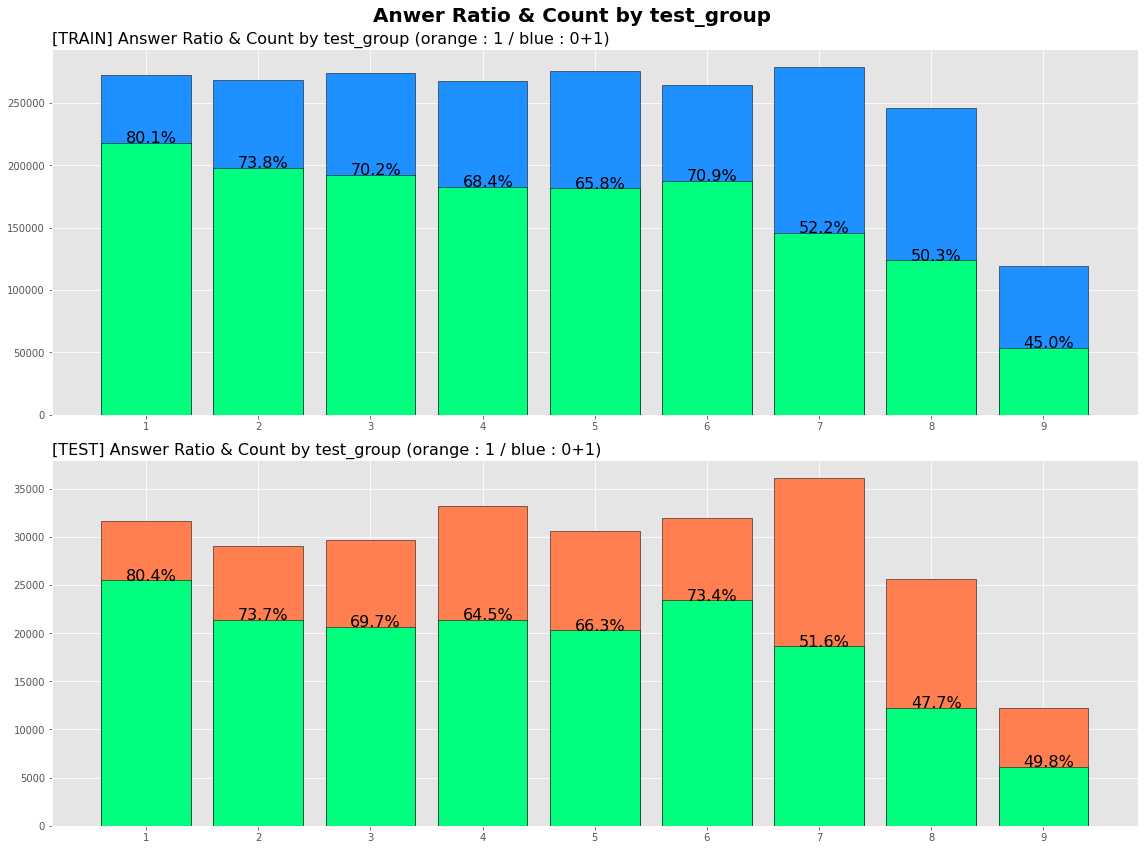

In [102]:
def draw_test_group(train, test):
    fig, axes = plt.subplots(2,1, figsize=(16,12))
    
    train['test_group'] = train['testId'].apply(lambda x: int(x[2]))
    t_sum = train.groupby('test_group')['answerCode'].sum()
    t_count = train.groupby('test_group')['answerCode'].count()
    t_answer = train.groupby('test_group')['answerCode'].sum()/train.groupby('test_group')['answerCode'].count()*100

    axes[0].bar(t_count.index, t_count.values, color='dodgerblue', edgecolor='black')
    axes[0].bar(t_sum.index, t_sum.values, color='springgreen', edgecolor='black')
    axes[0].set_title('[TRAIN] Answer Ratio & Count by test_group (orange : 1 / blue : 0+1)', size=16, loc='left')
    axes[0].set_xticks(np.arange(1,10))

    for i in range(1,10):
        axes[0].text(x = i-0.18,
                     y = t_sum[i],
                     s = f"{t_answer[i]:.1f}%", size=16)

    test['test_group'] = test['testId'].apply(lambda x: int(x[2]))
    t_sum = test.groupby('test_group')['answerCode'].sum()
    t_count = test.groupby('test_group')['answerCode'].count()
    t_answer = test.groupby('test_group')['answerCode'].sum()/test.groupby('test_group')['answerCode'].count()*100

    axes[1].bar(t_count.index, t_count.values, color='coral', edgecolor='black')
    axes[1].bar(t_sum.index, t_sum.values, color='springgreen', edgecolor='black')
    axes[1].set_title('[TEST] Answer Ratio & Count by test_group (orange : 1 / blue : 0+1)', size=16, loc='left')
    axes[1].set_xticks(np.arange(1,10))
    
    for i in range(1,10):
        axes[1].text(x = i-0.18,
                     y = t_sum[i],
                     s = f"{t_answer[i]:.1f}%", size=16)
    
    plt.suptitle("Anwer Ratio & Count by test_group", size=20, weight='bold')
    plt.tight_layout()
    plt.savefig("_20_test_group.png", dpi=300)
    plt.show();
    
draw_test_group(train, test)

### 20 test group 별 정답률 및 총 문제 수
1. test_group 에 따른 정답률이 다른 것을 알 수 있다.
2. 각 test_group 은 난이도와 어느정도 연관성이 있을 수 있다.
3. test_group에 따라 정답률이 다르므로, 모델이 학습하는 분포가 다르기 때문에, test_group 별 Prediction 값의 분포가 다를 수 있다.

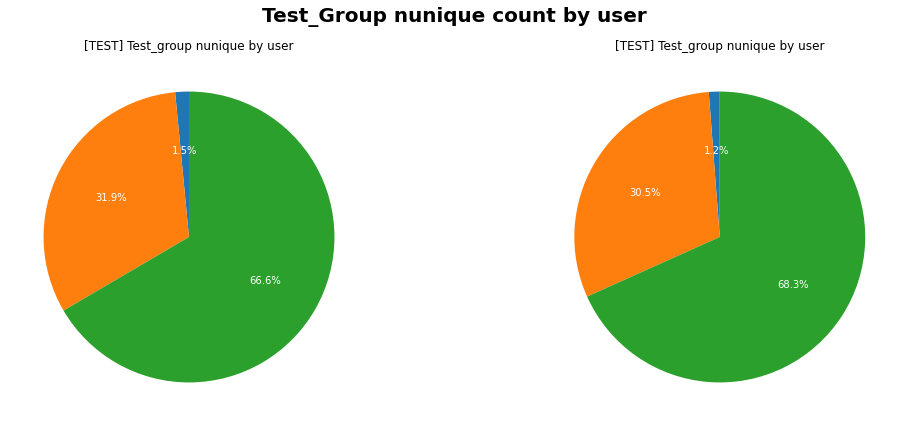

In [119]:
def draw_test_group_nunique_count(train, test):
    fig, axes = plt.subplots(1,2, figsize=(16,6))

    test_group = train.groupby('userID')['test_group'].nunique().to_frame('count')
    test_group = test_group.groupby('count')['count'].count().to_frame('count')
    axes[0].pie(test_group['count'], labels=test_group.index, autopct='%1.1f%%', startangle=90, colors=mcolors.TABLEAU_COLORS, textprops = {'color':'w'})
    axes[0].set_title(f"[TEST] Test_group nunique by user", size=12)

    test_group = test.groupby('userID')['test_group'].nunique().to_frame('count')
    test_group = test_group.groupby('count')['count'].count().to_frame('count')
    axes[1].pie(test_group['count'], labels=test_group.index, autopct='%1.1f%%', startangle=90, colors=mcolors.TABLEAU_COLORS, textprops = {'color':'w'})
    axes[1].set_title(f"[TEST] Test_group nunique by user", size=12)

    plt.suptitle("Test_Group nunique count by user", size=20, weight='bold')
    plt.tight_layout()
    plt.savefig(f"_21_test_group_count_by_user", dpi=300)
    plt.show();
    
draw_test_group_nunique_count(train, test)

### 21 User 별 학습하는 문제의 test_group 개수
1. user 별로 test_group 에 최소 1가지에서 최대 3가지까지 노출 된다.
2. test_group 의 숫자가 올라가면서 정답률이 떨어지는 경향성으로 보아 `문제(테스트 시험지)의 난이도`에 관한 지표일 수도 있겠다.
3. 각 user 가 최대 3가지 test_group 에 노출되는 것을 보면 선수학습을 생각할 수 있고, 가장 낮은 숫자가 user의 나이(학년)라고 추정할 수도 있겠다.
4. 선수학습을 한 것이라면 그 경우에는 정답률이 더 낮을 수 있겠다. 즉, 본인 나이에 맞는 문제를 풀지 않을 경우 정답률이 더 낮을 수 있겠다.
5. 각 user 별 노출되는 test_group 의 nunique 를 추가해줄 경우, 각 학생의 학습 수준에 대한 간접정보를 추가할 수 있겠다.
6. 9번 그룹이더라도 그 학년이 풀었을 때의 정답률과 선수학습을 해서 풀었을 때의 정답률을 비교해보자.
7. 주어진 숫자가 연속된 1-9 학년을 나타내는 것이 아닐 수 있다. 실제 순서와 매칭되는 순서를 찾아보자.
8. 만약 주어진 데이터가 한 user 의 모든 선수학습 데이터를 포함하지 않을 수도 있다.

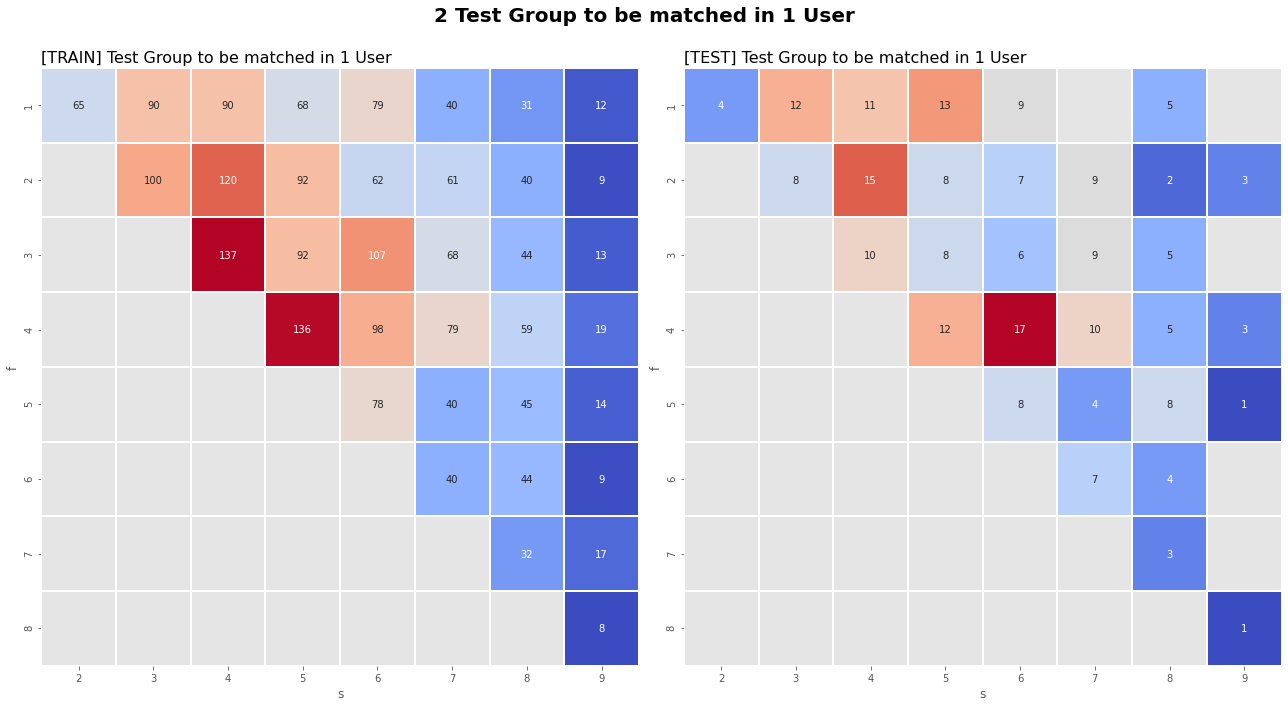

In [132]:
def test_group_matched(train, test):
    fig, axes = plt.subplots(1,2,figsize=(18,10))

    _unique = train.groupby('userID')['test_group'].unique().to_frame("unique")
    _unique['len'] = _unique['unique'].apply(lambda x: len(x))
    _uni2 = _unique[_unique['len'] == 2]
    _uni2['unique'] = _uni2['unique'].apply(lambda x: sorted(x))
    _uni2['f'] = _uni2['unique'].apply(lambda x: x[0]).astype('str')
    _uni2['s'] = _uni2['unique'].apply(lambda x: x[1]).astype('str')
    _uni2['all'] = _uni2['f'] + _uni2['s']
    uni2 = _uni2.groupby(['f','s'])['all'].agg(len).unstack()

    sns.heatmap(uni2, annot=True, fmt='.3g', cbar=False, square=True, cmap='coolwarm', ax=axes[0], linewidths=1)
    axes[0].set_title("[TRAIN] Test Group to be matched in 1 User", loc='left', size= 16)

    _unique = test.groupby('userID')['test_group'].unique().to_frame("unique")
    _unique['len'] = _unique['unique'].apply(lambda x: len(x))
    _uni2 = _unique[_unique['len'] == 2]
    _uni2['unique'] = _uni2['unique'].apply(lambda x: sorted(x))
    _uni2['f'] = _uni2['unique'].apply(lambda x: x[0]).astype('str')
    _uni2['s'] = _uni2['unique'].apply(lambda x: x[1]).astype('str')
    _uni2['all'] = _uni2['f'] + _uni2['s']
    uni2 = _uni2.groupby(['f','s'])['all'].agg(len).unstack()

    sns.heatmap(uni2, annot=True, fmt='.3g', cbar=False, square=True, cmap='coolwarm', ax=axes[1], linewidths=1)
    axes[1].set_title("[TEST] Test Group to be matched in 1 User", loc='left', size=16)

    plt.suptitle("2 Test Group to be matched in 1 User", weight='bold', size=20)
    plt.tight_layout()
    plt.savefig('_22_test_group_matched', dpi=300)
    plt.show();
    
test_group_matched(train, test)

### 22 2개의 test_group 에 노출된 상관관계 표현
* 1번 난이도를 푼 사람이 2-9 난이도를 푼 갯수를 표현하고 있습니다.
* 2번 난이도를 풀고 1번을 푼 것과 같은, 순서는 고려하지 않고 있습니다.
* 이 데이터는 한 유저가 한번에 어떤 난이도를 같이 풀었는지 보여줍니다.
* 학년이라고 하기에는 유저별로 모든 난이도가 고려되고 있습니다.(어떤 유저는 [2,3], [2,9] 식이므로 난이도 == 학년 이라고 보기보다는 다른 상황일 것으로 보입니다.)
* Train, Test set 의 분포가 일치하지 않습니다. Test set 의 데이터가 적은 것으로 보입니다.


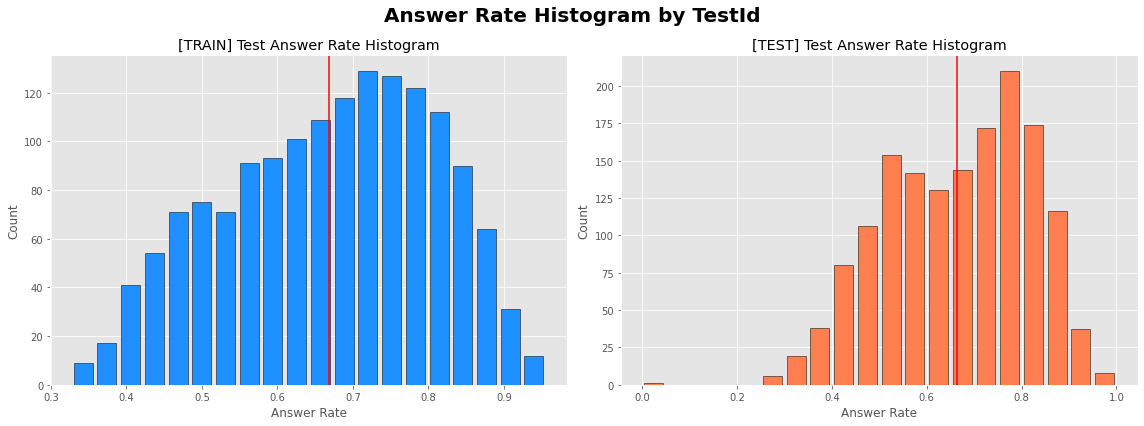

In [151]:
def testid_answer_ratio(train, test):
    def percentile(s):
        return np.sum(s) / len(s)

    fig, axes = plt.subplots(1,2, figsize=(16,6))

    test_groupby = train.groupby('testId').agg({'userID': 'count', 'answerCode': percentile})
    axes[0].hist(test_groupby['answerCode'], bins = 20, rwidth=0.8, color='dodgerblue' ,edgecolor='black')
    axes[0].set_title('[TRAIN] Test Answer Rate Histogram')
    axes[0].set_xlabel('Answer Rate')
    axes[0].set_ylabel('Count')
    axes[0].axvline(test_groupby['answerCode'].mean(), color='red')
    axes[0].grid(b=True)

    test_groupby = test.groupby('testId').agg({'userID': 'count', 'answerCode': percentile})
    axes[1].hist(test_groupby['answerCode'], bins = 20, rwidth=0.8, color='coral', edgecolor='black')
    axes[1].set_title('[TEST] Test Answer Rate Histogram')
    axes[1].set_xlabel('Answer Rate')
    axes[1].set_ylabel('Count')
    axes[1].axvline(test_groupby['answerCode'].mean(), color='red')
    axes[1].grid(b=True)

    plt.suptitle('Answer Rate Histogram by TestId', weight='bold', size=20)
    plt.tight_layout()
    plt.savefig('_30_answer_ratio_testid', dpi=300)
    plt.show();
    
testid_answer_ratio(train, test)

### 30 Answer Rate Histogram by TestId
* TestId 별 정답률 분포
* TRAIN, TEST set 의 분포가 잘 일치하지 않으므로, validation set 을 구성할 때 점검할 필요가 있겠다.

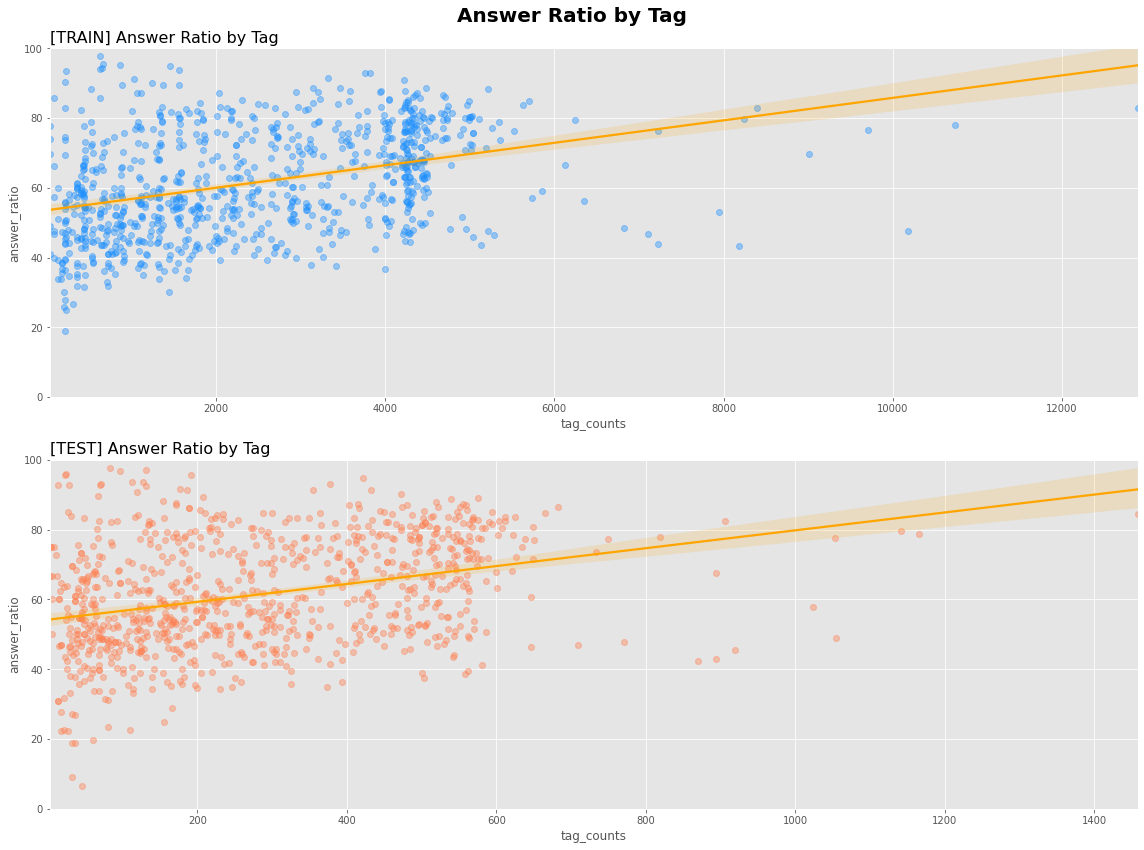

In [169]:
def answer_ratio_tag(train, test):
    fig, axes = plt.subplots(2,1,figsize=(16,12))

    tag_answer = train.groupby('KnowledgeTag')['answerCode']
    tag_sum = tag_answer.sum()
    tag_count = tag_answer.count()

    tag = tag_sum.to_frame()
    tag = pd.concat([tag, tag_count], 1)
    tag.columns = ['tag_correct','tag_counts']
    tag['answer_ratio'] = tag['tag_correct']/tag['tag_counts']*100
    tag['tag_incorrect'] = tag['tag_counts'] - tag['tag_correct'] 

    sns.regplot(data=tag, x='tag_counts', y='answer_ratio',
               line_kws={"color": "orange"}, scatter_kws={'alpha': 0.4}, color='dodgerblue', ax = axes[0])
    axes[0].set_ylim([0,100])
    axes[0].set_title("[TRAIN] Answer Ratio by Tag", size=16, loc='left')

    tag_answer = test.groupby('KnowledgeTag')['answerCode']
    tag_sum = tag_answer.sum()
    tag_count = tag_answer.count()

    tag = tag_sum.to_frame()
    tag = pd.concat([tag, tag_count], 1)
    tag.columns = ['tag_correct','tag_counts']
    tag['answer_ratio'] = tag['tag_correct']/tag['tag_counts']*100
    tag['tag_incorrect'] = tag['tag_counts'] - tag['tag_correct'] 

    sns.regplot(data=tag, x='tag_counts', y='answer_ratio',
               line_kws={"color": "orange"}, scatter_kws={'alpha': 0.4}, color='coral', ax = axes[1])
    axes[1].set_ylim([0,100])
    axes[1].set_title("[TEST] Answer Ratio by Tag", size=16, loc='left')

    plt.suptitle("Answer Ratio by Tag", weight='bold', size=20)
    plt.tight_layout()
    plt.savefig('_40_answer_ratio_by_tag',dpi=300)

    plt.show();
    
answer_ratio_tag(train, test)

### 40 Tag 별 정답률 추이
* 많이 노출된 Tag 일 수록 정답률이 높아진다.

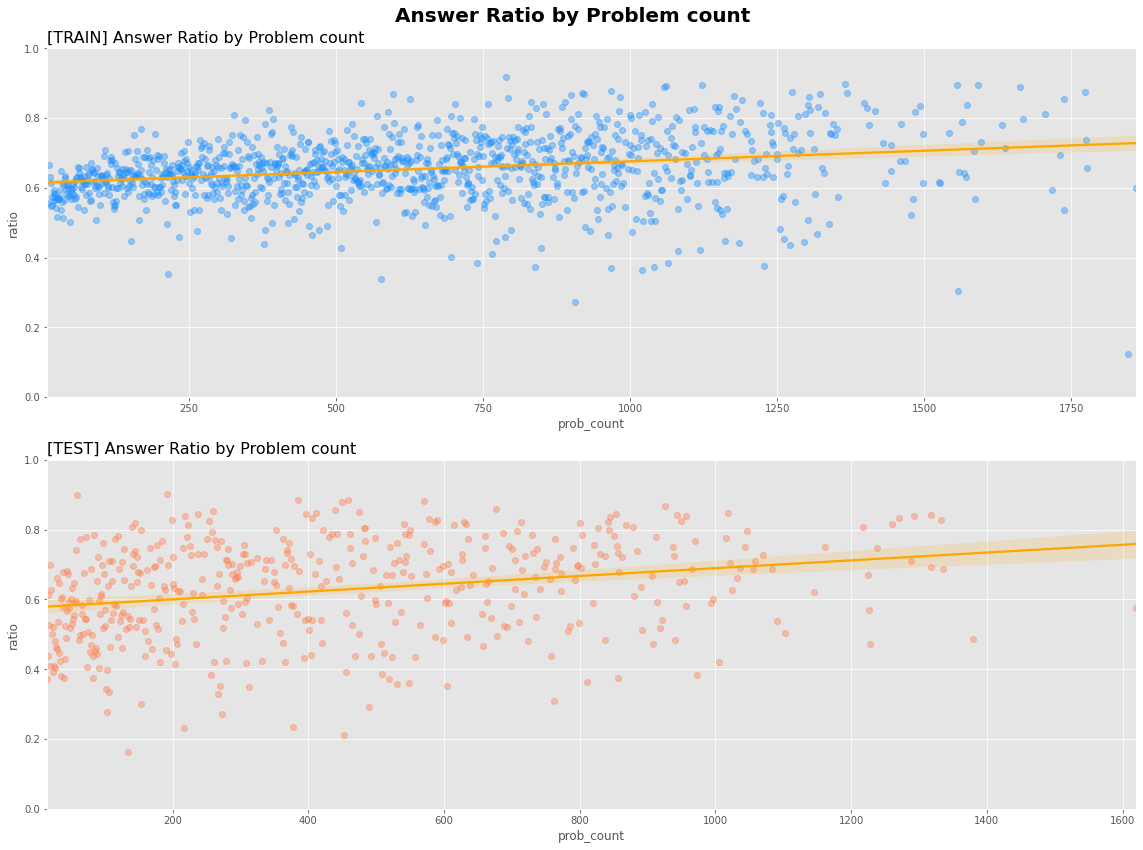

In [176]:
def answer_ratio_prob_count(train, test):
    fig, axes = plt.subplots(2,1, figsize=(16,12))

    prob_count_by_user = train.groupby('userID')['answerCode'].count().to_frame('prob_count').reset_index()
    train = pd.merge(train, prob_count_by_user, how = 'left', on = 'userID')
    prob_count = train.groupby('prob_count')['answerCode'].agg(percentile).to_frame('ratio').reset_index()
    sns.regplot(data=prob_count, x='prob_count', y='ratio',
               line_kws={"color": "orange"}, scatter_kws={'alpha': 0.4}, color='dodgerblue', ax=axes[0])
    axes[0].set_ylim([0,1])
    axes[0].set_title("[TRAIN] Answer Ratio by Problem count", size=16, loc='left')

    prob_count_by_user = test.groupby('userID')['answerCode'].count().to_frame('prob_count').reset_index()
    test = pd.merge(test, prob_count_by_user, how = 'left', on = 'userID')
    prob_count = test.groupby('prob_count')['answerCode'].agg(percentile).to_frame('ratio').reset_index()
    sns.regplot(data=prob_count, x='prob_count', y='ratio',
               line_kws={"color": "orange"}, scatter_kws={'alpha': 0.4}, color='coral', ax=axes[1])

    axes[1].set_ylim([0,1])
    axes[1].set_title("[TEST] Answer Ratio by Problem count", size=16, loc='left')

    plt.suptitle("Answer Ratio by Problem count", weight='bold', size=20)
    plt.tight_layout()
    plt.savefig('_50_answer_ratio_by_Problem count',dpi=300)

    plt.show();

answer_ratio_prob_count(train, test)

### 50 Answer Ratio by Problem count
1. 문제를 많이 풀수록 정답률이 올라가는 경향이 보인다.

In [ ]:
# 마크다운 모음

### 00 user 별로 푼 문제의 수와 분포를 나타낸다.
1. 문제를 적게 푼 사람이 400~500 명씩 꽤 많은 분포가 있는 것을 알 수 있다.  
    : `문제 수가 적을 수록 과적합될 여지`가 많기 때문에, `문제를 적게 푼 user 에 대해서 모델의 결과값을 비교 분석`할 필요가 있겠다.
2. train 과 test set 의 분포는 전반적으로 비슷하다.


### 10 user 정답률을 나타낸다.
1. 학생별 정답률의 분포는 bins=20 기준으로 위와 같다.
2. Train 데이터셋과 Test 데이터셋은 약 2%의 평균 및 중앙값 정답률 차이를 보인다. 
3. Train 데이터와 Test 데이터의 정답률 분포가 다르다.
4. Validation set 을 구축할 때, assessmentItemID 등의 column 의 유사도 외에도 Test 데이터셋과의 정답률 분포도 확인해볼 필요가 있겠다.

### 20 test group 별 정답률 및 총 문제 수
1. test_group 에 따른 정답률이 다른 것을 알 수 있다.
2. 각 test_group 은 난이도와 어느정도 연관성이 있을 수 있다.
3. test_group에 따라 정답률이 다르므로, 모델이 학습하는 분포가 다르기 때문에, test_group 별 Prediction 값의 분포가 다를 수 있다.

### 21 User 별 학습하는 문제의 test_group 개수
1. user 별로 test_group 에 최소 1가지에서 최대 3가지까지 노출 된다.
2. test_group 의 숫자가 올라가면서 정답률이 떨어지는 경향성으로 보아 `문제(테스트 시험지)의 난이도`에 관한 지표일 수도 있겠다.
3. 각 user 가 최대 3가지 test_group 에 노출되는 것을 보면 선수학습을 생각할 수 있고, 가장 낮은 숫자가 user의 나이(학년)라고 추정할 수도 있겠다.
4. 선수학습을 한 것이라면 그 경우에는 정답률이 더 낮을 수 있겠다. 즉, 본인 나이에 맞는 문제를 풀지 않을 경우 정답률이 더 낮을 수 있겠다.
5. 각 user 별 노출되는 test_group 의 nunique 를 추가해줄 경우, 각 학생의 학습 수준에 대한 간접정보를 추가할 수 있겠다.
6. 9번 그룹이더라도 그 학년이 풀었을 때의 정답률과 선수학습을 해서 풀었을 때의 정답률을 비교해보자.
7. 주어진 숫자가 연속된 1-9 학년을 나타내는 것이 아닐 수 있다. 실제 순서와 매칭되는 순서를 찾아보자.
8. 만약 주어진 데이터가 한 user 의 모든 선수학습 데이터를 포함하지 않을 수도 있다.

### 22 2개의 test_group 에 노출된 상관관계 표현
* 1번 난이도를 푼 사람이 2-9 난이도를 푼 갯수를 표현하고 있습니다.
* 2번 난이도를 풀고 1번을 푼 것과 같은, 순서는 고려하지 않고 있습니다.
* 이 데이터는 한 유저가 한번에 어떤 난이도를 같이 풀었는지 보여줍니다.
* 학년이라고 하기에는 유저별로 모든 난이도가 고려되고 있습니다.(어떤 유저는 [2,3], [2,9] 식이므로 난이도 == 학년 이라고 보기보다는 다른 상황일 것으로 보입니다.)
* Train, Test set 의 분포가 일치하지 않습니다. Test set 의 데이터가 적은 것으로 보입니다.

### 30 Answer Rate Histogram by TestId
* TestId 별 정답률 분포
* TRAIN, TEST set 의 분포가 잘 일치하지 않으므로, validation set 을 구성할 때 점검할 필요가 있겠다.

### 40 Tag 별 정답률 추이
* 많이 노출된 Tag 일 수록 정답률이 높아진다.

### 50 Answer Ratio by Problem count
1. 문제를 많이 풀수록 정답률이 올라가는 경향이 보인다.
